In [ ]:
%matplotlib widget
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pickle
import sys
sys.path.append("..")
from scripts.batch_statistics import Batch


In [3]:
xlarge=18; large = 16; med = 16; small = 14
params = {'axes.titlesize': med,
          'legend.fontsize': 12,
          'axes.labelsize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': med,
          "font.family": "serif"}
  
mpl.rc('font',family='serif')
plt.rcParams.update(params)

In [4]:
#get data for Na simulations from 100-1000
#proves there is minimal difference between
#characteristic agg aspect ratio dependent on # of aggs created
phioarr=np.logspace(-2, 2, num=20, dtype=None)
Na=[100,300,500,1000]

chs_flat=np.empty((len(phioarr),len(Na)))
pos_error_flat=np.empty((len(phioarr),len(Na)))
neg_error_flat=np.empty((len(phioarr),len(Na)))
agg_phi_flat=np.empty((len(phioarr),0,len(Na)))

chs_rand=np.empty((len(phioarr),len(Na)))
pos_error_rand=np.empty((len(phioarr),len(Na)))
neg_error_rand=np.empty((len(phioarr),len(Na)))

for c,n in enumerate(Na):
    f = open('../instance_files/instance_iceice_flat_r10_phi20_n'+str(n), 'rb')
    results = pickle.load(f)
    agg_as = results['agg_as'] #major axis of agg
    agg_cs = results['agg_cs'] #minor axis of agg
    agg_phi_flat=agg_cs/agg_as #calculate new aspect ratio, a>c always
    f = open('../instance_files/instance_iceice_rand_r10_phi20_n'+str(n), 'rb')
    results = pickle.load(f)
    agg_as = results['agg_as'] #major axis of agg
    agg_cs = results['agg_cs'] #minor axis of agg
    agg_phi_rand=agg_cs/agg_as #calculate new aspect ratio, a>c always
  
    for i in range(len(phioarr)):
        #calculate characteristic value of dist of Na aggs from gamma
        batch = Batch(agg_phi_flat[i,0,:])
        batch.fit_distribution()
        chs_flat[i,c]=batch.gamma_ch
        pos_error_flat[i,c]=batch.pos_error
        neg_error_flat[i,c]=batch.neg_error
        
        batch = Batch(agg_phi_rand[i,0,:])
        batch.fit_distribution()
        chs_rand[i,c]=batch.gamma_ch
        pos_error_rand[i,c]=batch.pos_error
        neg_error_rand[i,c]=batch.neg_error
        

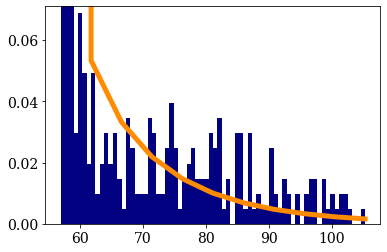

0.01


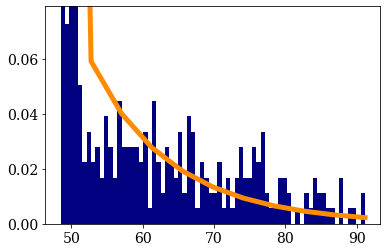

0.016237767391887217


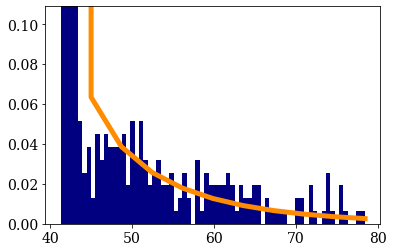

0.026366508987303583


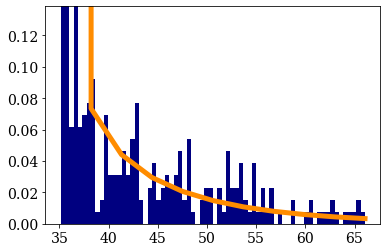

0.04281332398719394


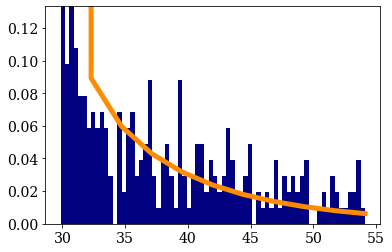

0.06951927961775606


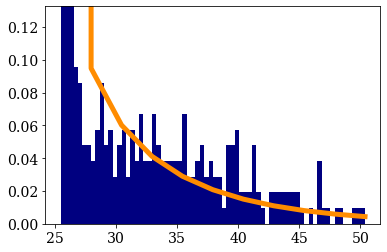

0.11288378916846889


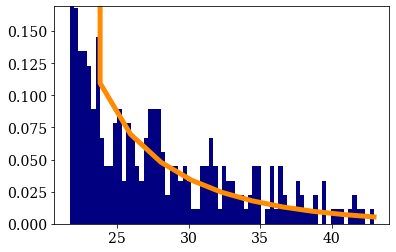

0.18329807108324356


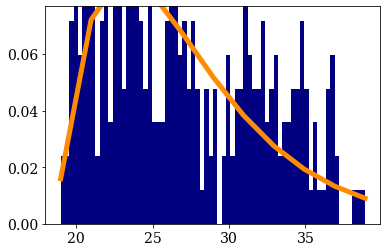

0.29763514416313175


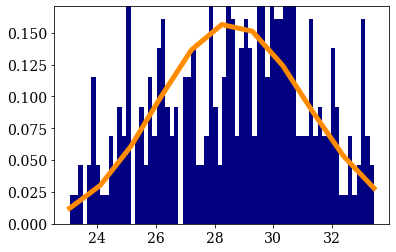

0.4832930238571752


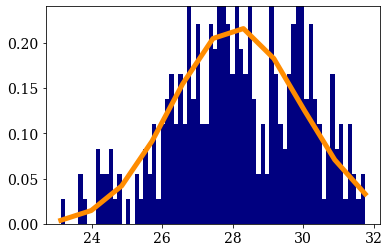

0.7847599703514611


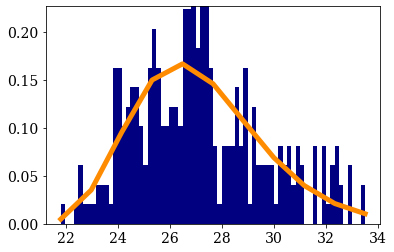

1.2742749857031335


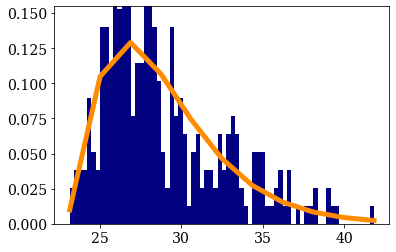

2.06913808111479


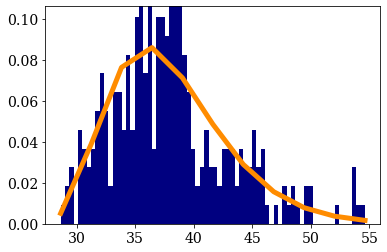

3.359818286283781


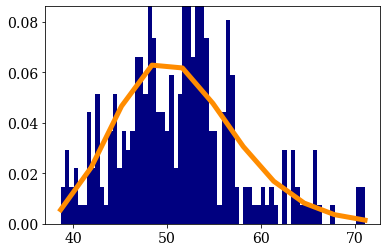

5.455594781168514


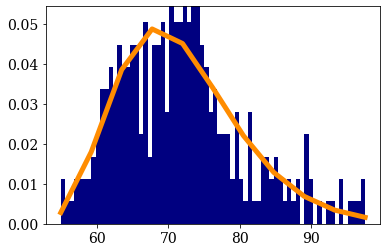

8.858667904100823


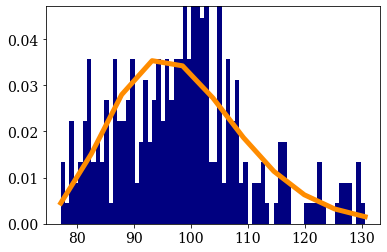

14.38449888287663


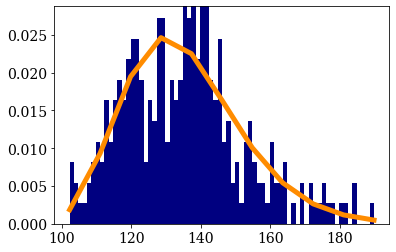

23.357214690901213


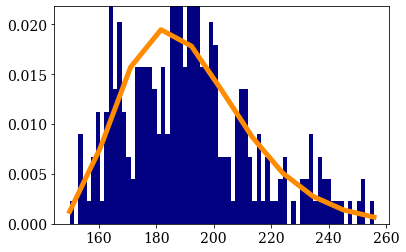

37.92690190732246


KeyboardInterrupt: 

In [163]:
#get data for multiple simulations all with Na=300
#displays variance between simulations due to random built in 
#functions in IPAS
Na=300
N = [1,2,3,4]

agg_as_flat_runs = np.empty((len(N), len(phioarr), Na))
agg_cs_flat_runs = np.empty((len(N), len(phioarr), Na))
chs_as_flat_runs=np.empty((len(N), len(phioarr))) #ch major axis 
chs_cs_flat_runs=np.empty((len(N), len(phioarr))) #ch major axis 
chs_flat_runs=np.empty((len(N), len(phioarr)))
pos_error_flat_runs=np.empty((len(N), len(phioarr)))
neg_error_flat_runs=np.empty((len(N), len(phioarr)))
agg_phi_flat_runs=np.empty((len(N), len(phioarr)))

agg_as_rand_runs = np.empty((len(N), len(phioarr), Na))
agg_cs_rand_runs = np.empty((len(N), len(phioarr), Na))
chs_as_rand_runs=np.empty((len(N), len(phioarr))) #ch major axis 
chs_cs_rand_runs=np.empty((len(N), len(phioarr))) #ch minor axis 
chs_rand_runs=np.empty((len(N),len(phioarr))) #ch aspect ratio
pos_error_rand_runs=np.empty((len(N), len(phioarr)))
neg_error_rand_runs=np.empty((len(N), len(phioarr)))
agg_phi_rand_runs=np.empty((len(N), len(phioarr)))

for c,n in enumerate(N): #loop over simulations
    f = open('../instance_files/instance_iceice_flat_r10_phi20_run'+str(n), 'rb')
    results = pickle.load(f)
    agg_as_flat_runs[c,:,:] = results['agg_as'][:,0,:] #major axis of agg
    agg_cs_flat_runs[c,:,:] = results['agg_cs'][:,0,:] #minor axis of agg
    agg_phi_flat_runs=agg_cs_flat_runs[c,:,:]/agg_as_flat_runs[c,:,:] #calculate new aspect ratio, a>c always (0-1)
    f = open('../instance_files/instance_iceice_rand_r10_phi20_run'+str(n), 'rb')
    results = pickle.load(f)
    agg_as_rand_runs[c,:,:] = results['agg_as'][:,0,:] #major axis of agg
    agg_cs_rand_runs[c,:,:] = results['agg_cs'][:,0,:] #minor axis of agg
    #shape = (20, 300) for 1 simulation
    agg_phi_rand_runs=agg_cs_rand_runs[c,:,:]/agg_as_rand_runs[c,:,:] #calculate new aspect ratio, a>c always
    
    for i in range(len(phioarr)): #loop over monomer aspect ratios
        #calculate characteristic value of dist of Na aggs from gamma distribution
        batch = Batch(agg_phi_flat_runs[i,:]) #shape = 300
        batch.fit_distribution()
        chs_flat_runs[c,i]=batch.gamma_ch
        pos_error_flat_runs[c,i]=batch.pos_error
        neg_error_flat_runs[c,i]=batch.neg_error
        #get char a axis also 
        batch = Batch(agg_as_flat_runs[c,i,:]) #need to specify which simulation
        batch.fit_distribution(plot=True)
        print(phioarr[i])
        chs_as_flat_runs[c,i]=batch.gamma_ch
        batch = Batch(agg_cs_flat_runs[c,i,:]) #need to specify which simulation
        batch.fit_distribution(plot=False)
        chs_cs_flat_runs[c,i]=batch.gamma_ch
        
        batch = Batch(agg_phi_rand_runs[i,:])
        batch.fit_distribution()
        chs_rand_runs[c,i]=batch.gamma_ch
        pos_error_rand_runs[c,i]=batch.pos_error
        neg_error_rand_runs[c,i]=batch.neg_error
        #get char a axis also 
        batch = Batch(agg_as_rand_runs[c,i,:])
        batch.fit_distribution()
        chs_as_rand_runs[c,i]=batch.gamma_ch
        batch = Batch(agg_cs_rand_runs[c,i,:])
        batch.fit_distribution()
        chs_cs_rand_runs[c,i]=batch.gamma_ch


In [197]:
np.shape(phio_c), np.shape(chs_rand_runs[10:,n])

((10,), (0,))

In [265]:
phio_p, chs_flat[10:,n]

(array([0.01      , 0.01623777, 0.02636651, 0.04281332, 0.06951928,
        0.11288379, 0.18329807, 0.29763514, 0.48329302, 0.78475997]),
 array([0.55052348, 0.51790363, 0.34246101, 0.21199941, 0.14385694,
        0.07737326, 0.05024636, 0.02774029, 0.01881662, 0.01126359]))

0.9532952121336841 -0.21304840650480805


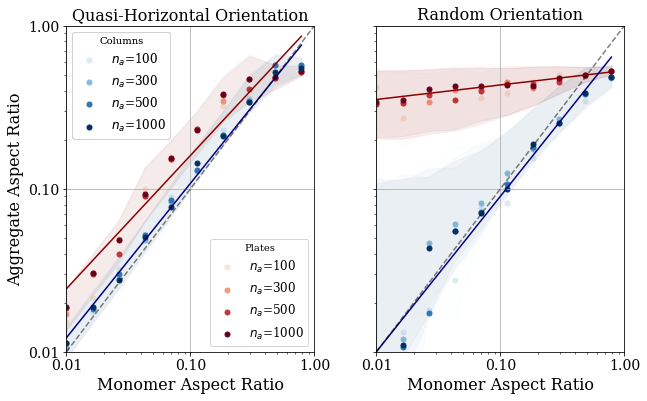

In [49]:
#plot IPAS char aspect ratio for different Na to see consistency in trends
#plot IPAS reproducibility with 300 aggs on bottom
s=25 #scatter marker size
Na=[100,300,500,1000]
N=[1,2,3,4]
marker=['X','o','+','v']
colors_p=['#D5FFAD','#79E297','#328581','#111A7E']
colors_c=['#F5B841','#DA9D58','#B05E2F','#3B0210']

cmap = cm.get_cmap('RdBu', 8) 
colors=[]
for i in range(cmap.N):
     rgba = cmap(i)
     # rgb2hex accepts rgb or rgba
     colors.append(mpl.colors.rgb2hex(rgba))
colors_p=colors[:4]
colors_p.reverse()
colors_c=colors[4:]
colors_c

phio=np.logspace(-2, 2, num=20, dtype=None)
phio_p=phio[:10]
phio_c = 1/phio[10:]
alpha=0.03

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,6))
plt.subplots_adjust(wspace=0.25, hspace=0.1)
###############################################
cols=[]
plates=[]
for n in range(len(Na)):
    ax1.fill_between(phio_p, neg_error_flat[:10,n], pos_error_flat[:10,n], color=colors_p[n], alpha=alpha)
    plate=ax1.scatter(phio_p, chs_flat[:10,n], c=colors_p[n], label="$n_a$={}".format(Na[n]),s=s)
    ax1.fill_between(phio_c, neg_error_flat[10:,n], pos_error_flat[10:,n], color=colors_c[n], alpha=alpha)
    col=ax1.scatter(phio_c, chs_flat[10:,n], c=colors_c[n], label="$n_a$={}".format(Na[n]), s=s)
    cols.append(col)
    plates.append(plate)
    if n==3:
        #plot regression lines QH
        m, b = np.polyfit(np.log(phio_c), np.log(chs_flat[10:,n]), 1)
        y_fit = np.exp(m*np.log(phio_c) + b) 
        fit_col=ax1.plot(phio_c, y_fit, color='navy')
        m, b = np.polyfit(np.log(phio_p), np.log(chs_flat[:10,n]), 1)
        y_fit = np.exp(m*np.log(phio_p) + b) # calculate the fitted values of y 
        ax1.plot(phio_p, y_fit, color='darkred')

ax1.plot(np.logspace(-2, 0), np.logspace(-2, 0), 'k', linestyle='dashed', alpha=0.5)
leg_labels=["$n_a$={}".format(Na[n]) for n in range(len(Na))]
leg1 = ax1.legend(plates, leg_labels, loc='lower right', title='Plates')
leg2 = ax1.legend(cols,leg_labels, loc='upper left', title='Columns')
ax1.add_artist(leg1)
ax1.add_artist(leg2)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([0.01,1.0])
ax1.set_xlim([0.01,1.0])
ax1.grid()
ax1.set_ylabel('Aggregate Aspect Ratio')
ax1.set_title('Quasi-Horizontal Orientation');
ax1.set_xlabel('Monomer Aspect Ratio')
###############################################

for n in range(len(Na)):
    ax2.fill_between(phio_p, neg_error_rand[:10,n], pos_error_rand[:10,n], alpha=0.05, color=colors_p[n])
    ax2.scatter(phio_p, chs_rand[:10,n], c=colors_p[n], s=s)
    ax2.fill_between(phio_c, neg_error_rand[10:,n], pos_error_rand[10:,n], alpha=alpha, color=colors_c[n])
    ax2.scatter(phio_c, chs_rand[10:,n], c=colors_c[n],s=s)
    if n==3:
        #plot regression lines - random
        m, b = np.polyfit(np.log(phio_p), np.log(chs_rand[:10,n]), 1)
        y_fit = np.exp(m*np.log(phio_p) + b) # calculate the fitted values of y 
        plt.plot(phio_p, y_fit, color='darkred')
        
        m, b = np.polyfit(np.log(phio_c), np.log(chs_rand[10:,n]), 1)
        print(m,b)
        y_fit = np.exp(m*np.log(phio_c) + b) # calculate the fitted values of y 
        plt.plot(phio_c, y_fit, color='navy')
        
        
ax2.plot(np.logspace(-2, 0), np.logspace(-2, 0), 'k', linestyle='dashed', alpha=0.5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([0.01,1.0])
ax2.set_xlim([0.01,1.0])
ax2.grid()
ax2.set_xlabel('Monomer Aspect Ratio')
ax2.set_title('Random Orientation');

#made next two plots into a table
###############################################

# for n in range(len(N)):
#     ax3.fill_between(phio_p, neg_error_flat_runs[:10,n], pos_error_flat_runs[:10,n], alpha=0.05, color=colors_p[1])
#     ax3.scatter(phio_p, chs_flat_runs[:10,n], marker=marker[n], c=colors_p[3], s=s, label="simulation {}".format(n+1))
#     ax3.fill_between(phio_c, neg_error_flat_runs[10:,n], pos_error_flat_runs[10:,n], alpha=0.05, color=colors_c[1])
#     ax3.scatter(phio_c, chs_flat_runs[10:,n], marker=marker[n], c=colors_c[3], s=s)
    
# ax3.set_xscale('log')
# ax3.legend(loc='upper left')
# ax3.set_ylim([0.0,1.0])
# ax3.set_xlim([0.01,1.0])
# ax3.grid()
# ax3.set_ylabel('Aggregate Aspect Ratio')
# ax3.set_xlabel('Monomer Aspect Ratio')

# ###############################################
# for n in range(len(N)):
#     ax4.fill_between(phio_p, neg_error_rand_runs[:10,n], pos_error_rand_runs[:10,n], alpha=0.05, color=colors_p[1])
#     ax4.scatter(phio_p, chs_rand_runs[:10,n], marker=marker[n], c=colors_p[3], s=s)
#     ax4.fill_between(phio_c, neg_error_rand_runs[10:,n], pos_error_rand_runs[10:,n], alpha=0.05, color=colors_c[1])
#     ax4.scatter(phio_c, chs_rand_runs[10:,n], marker=marker[n], c=colors_c[3], s=s)
    
# ax4.set_xscale('log')
# #ax8.legend()
# ax4.set_ylim([0.0,1.0])
# ax4.set_xlim([0.01,1.0])
# ax4.grid()
# ax4.set_xlabel('Monomer Aspect Ratio')

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig('../plots/partI_aspectratios_Na.pdf',bbox_inches = 'tight')

In [67]:
y=np.exp(0.817*np.log(.1)+0.049)
y

0.16005912176392975

#### Standard deviation between runs for both orientations and plates and columns

In [49]:
rand_plate=np.mean(np.std(chs_rand_runs[:10,:], axis=1))
rand_column=np.mean(np.std(chs_rand_runs[10:,:], axis=1))
qh_plate=np.mean(np.std(chs_flat_runs[:10,:], axis=1))
qh_column=np.mean(np.std(chs_flat_runs[10:,:], axis=1))

print('rand plate std | rand column std | QH plate std | QH column std')
print(rand_plate, rand_column, qh_plate, qh_column)

rand plate std | rand column std | QH plate std | QH column std
0.015004794875682795 0.006222329990326268 0.006593482775573753 0.008213970755900088


### Below for change in axes lengths plot

In [52]:
#get monomer a and c axes
phioarr=np.logspace(-2, 2, num=20, dtype=None)
r=10
mono_as = []
mono_cs = []

for c, phio in enumerate(phioarr):
    mono_a =(r ** 3 / phio) ** (1. / 3.)
    mono_as.append(mono_a)
    mono_cs.append(phio * mono_a)

In [158]:
phio=np.logspace(-2, 2, num=20, dtype=None)
phio_p=phio[:10]
phio_c = 1/phio[10:]
r=10
mono_as=[]
mono_cs=[]
for phi in phio:
    mono_a =(r ** 3 / phi) ** (1. / 3.) #major axis
    mono_as.append(mono_a)
    mono_cs.append(phi * mono_a) #minor axis
mono_as_p=mono_as[:10]
mono_as_c=mono_as[10:]
mono_cs_p=mono_cs[:10]
mono_cs_c=mono_cs[10:]

In [87]:
#find avg major axis for both orientations across runs
agg_as_flat_plates=np.mean(chs_as_flat_runs[:,:10], axis=0) 
agg_as_flat_columns=np.mean(chs_as_flat_runs[:,10:], axis=0)
agg_as_rand_plates=np.mean(chs_as_rand_runs[:,:10], axis=0)
agg_as_rand_columns=np.mean(chs_as_rand_runs[:,10:], axis=0)
#find avg minor axis for both orientations across runs
agg_cs_flat_plates=np.mean(chs_cs_flat_runs[:,:10], axis=0) 
agg_cs_flat_columns=np.mean(chs_cs_flat_runs[:,10:], axis=0)
agg_cs_rand_plates=np.mean(chs_cs_rand_runs[:,:10], axis=0)
agg_cs_rand_columns=np.mean(chs_cs_rand_runs[:,10:], axis=0)
#find avg agg aspect ratio for both orientations across runs
agg_phi_flat_plates=np.mean(chs_flat_runs[:,:10], axis=0) 
agg_phi_flat_columns=np.mean(chs_flat_runs[:,10:], axis=0)
agg_phi_rand_plates=np.mean(chs_rand_runs[:,:10], axis=0)
agg_phi_rand_columns=np.mean(chs_rand_runs[:,10:], axis=0)


In [168]:
agg_as_flat_columns, mono_as_c, (agg_as_flat_columns-mono_cs_c)/mono_cs_c

(array([ 26.58962597,  26.92029342,  35.55459949,  48.70652779,
         69.98054572,  94.42234677, 130.21806406, 181.39535525,
        240.44083994, 353.52881164]),
 [9.223851039358479,
  7.847599703514612,
  6.676692939187565,
  5.680492161728428,
  4.832930238571754,
  4.1118294024358315,
  3.498320935775037,
  2.976351441631319,
  2.5322627816987953,
  2.154434690031884],
 array([1.26223017, 0.65788145, 0.58496106, 0.57166181, 0.63455063,
        0.59641193, 0.59364114, 0.60692121, 0.54179197, 0.64093538]))

In [136]:
#calculate relative change in axis lengths from monomer to aggregate
delta_flat_plates_major=(agg_as_flat_plates-mono_as_p)/mono_as_p
delta_flat_columns_major=(agg_as_flat_columns-mono_cs_c)/mono_cs_c
delta_rand_plates_minor=(agg_cs_rand_plates-mono_cs_p)/mono_cs_p
delta_rand_columns_minor=(agg_cs_rand_columns-mono_as_c)/mono_as_c
delta_flat_plates_minor=(agg_cs_flat_plates-mono_cs_p)/mono_cs_p
delta_flat_columns_minor=(agg_cs_flat_columns-mono_as_c)/mono_as_c
delta_rand_plates_major=(agg_as_rand_plates-mono_as_p)/mono_as_p
delta_rand_columns_major=(agg_as_rand_columns-mono_cs_c)/mono_cs_c

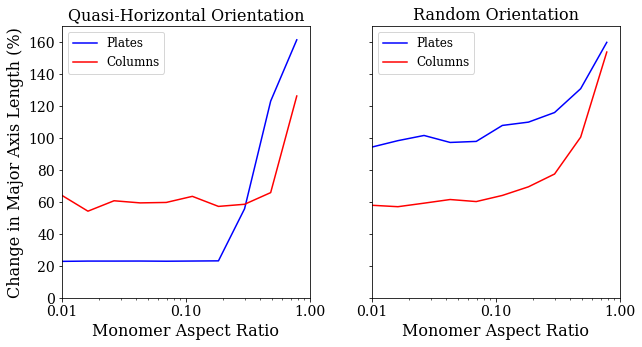

In [202]:
#averaged over 5 simulations with Na=300
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
plt.subplots_adjust(wspace=0.25, hspace=0.1)

ax1.plot(phio_p, delta_flat_plates*100, 'r', label='Plates')
ax1.plot(phio_c, delta_flat_columns*100, 'b', label='Columns')
ax1.legend()
ax1.set_ylabel('Change in Major Axis Length (%)')
ax1.set_title('Quasi-Horizontal Orientation')
ax1.set_xlim([0.01,1.0])
ax1.set_ylim([0.00,170])
ax1.set_xlabel('Monomer Aspect Ratio')
ax1.set_xscale('log')

ax2.plot(phio_p, delta_rand_plates*100, 'r', label='Plates')
ax2.plot(phio_c, delta_rand_columns*100, 'b', label='Columns')
ax2.legend()
ax2.set_title('Random Orientation')
ax2.set_xlim([0.01,1.0])
ax2.set_ylim([0.00,170])
ax2.set_xlabel('Monomer Aspect Ratio')
ax2.set_xscale('log')

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


In [203]:
delta_flat_plates

array([0.22786316, 0.22964631, 0.22963356, 0.22989277, 0.22882003,
       0.2299531 , 0.23110217, 0.55684826, 1.23019474, 1.61350688])

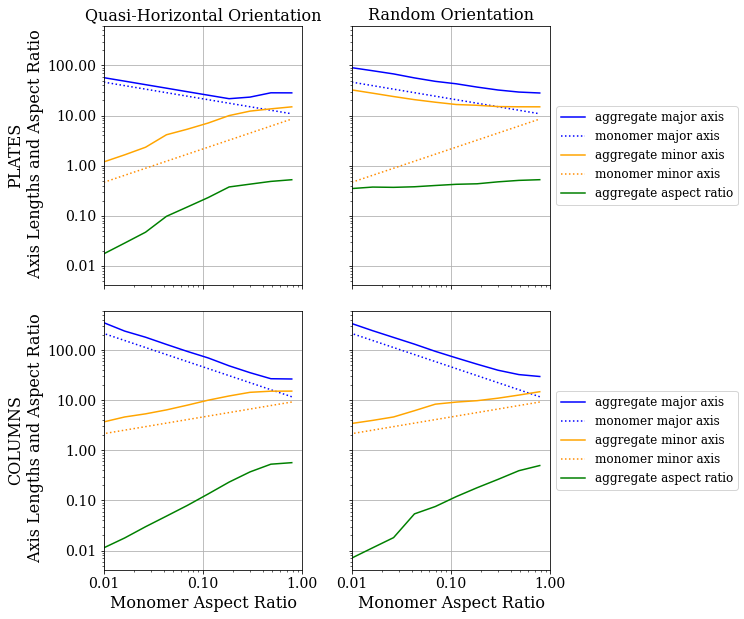

In [153]:
#averaged over 5 simulations with Na=300
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,10))
plt.subplots_adjust(wspace=0.25, hspace=0.1)

ax1.plot(phio_p, agg_as_flat_plates, 'b')
ax1.plot(phio_p, mono_as_p, 'b', linestyle='dotted')
ax1.plot(phio_p, agg_cs_flat_plates, 'orange')
ax1.plot(phio_p, mono_cs_p, 'darkorange', linestyle='dotted')
ax1.plot(phio_p, agg_phi_flat_plates, 'g')
ax1.grid()
ax1.set_ylabel('PLATES\n Axis Lengths and Aspect Ratio')
ax1.set_title('Quasi-Horizontal Orientation')
ax1.set_xlim([0.01,1.0])
#ax1.set_ylim([0.00,170])
ax1.set_xscale('log')
ax1.set_yscale('log')

###############################################################
ax2.plot(phio_p, agg_as_rand_plates, 'b', label='aggregate major axis')
ax2.plot(phio_p, mono_as_p, 'b', linestyle='dotted', label='monomer major axis')
ax2.plot(phio_p, agg_cs_rand_plates, 'orange',label='aggregate minor axis')
ax2.plot(phio_p, mono_cs_p, 'darkorange', linestyle='dotted', label='monomer minor axis')
ax2.plot(phio_p, agg_phi_rand_plates, 'g', label='aggregate aspect ratio')
ax2.grid()
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.legend()
ax2.set_title('Random Orientation')
ax2.set_xlim([0.01,1.0])
#ax2.set_ylim([0.00,170])
ax2.set_xscale('log')
ax2.set_yscale('log')

###############################################################

ax3.plot(phio_c, agg_as_flat_columns, 'b')
ax3.plot(phio_c, mono_cs_c, 'b', linestyle='dotted')
ax3.plot(phio_c, agg_cs_flat_columns, 'orange')
ax3.plot(phio_c, mono_as_c, 'darkorange', linestyle='dotted')
ax3.plot(phio_c, agg_phi_flat_columns, 'g')
ax3.grid()
ax3.set_ylabel('COLUMNS\n Axis Lengths and Aspect Ratio')
ax3.set_xlim([0.01,1.0])
ax3.set_xlabel('Monomer Aspect Ratio')
ax3.set_xscale('log')
ax3.set_yscale('log')

###############################################################

ax4.plot(phio_c, agg_as_rand_columns, 'b', label='aggregate major axis')
ax4.plot(phio_c, mono_cs_c, 'b', linestyle='dotted', label='monomer major axis')
ax4.plot(phio_c, agg_cs_rand_columns, 'orange', label='aggregate minor axis')
ax4.plot(phio_c, mono_as_c, 'darkorange', linestyle='dotted', label='monomer minor axis')
ax4.plot(phio_c, agg_phi_rand_columns, 'g', label='aggregate aspect ratio')
ax4.grid()
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.legend()
ax4.set_xlim([0.01,1.0])
#ax2.set_ylim([0.00,170])
ax4.set_xlabel('Monomer Aspect Ratio')
ax4.set_xscale('log')
ax4.set_yscale('log')

for ax in [ax1, ax2, ax3, ax4]:
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.savefig('../plots/partI_axislengths_aspectratios.pdf',bbox_inches = 'tight')

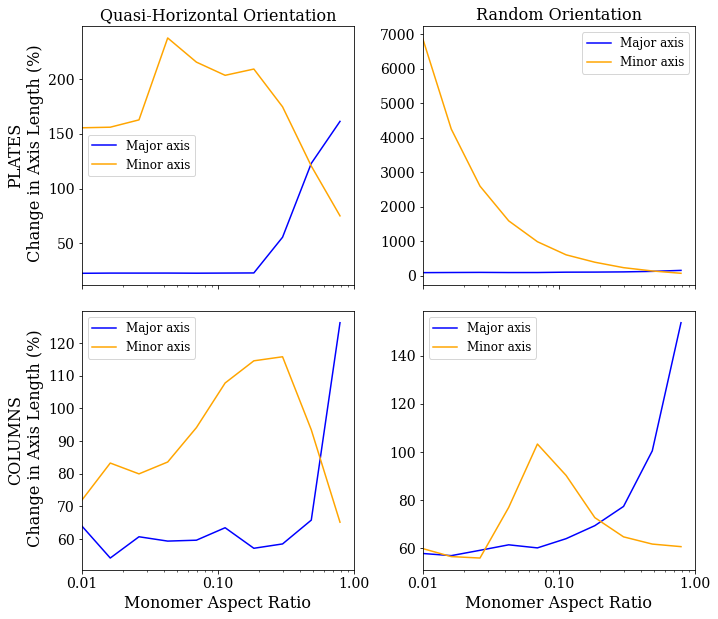

In [157]:
#averaged over 5 simulations with Na=300
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(11,10))
plt.subplots_adjust(wspace=0.25, hspace=0.1)

#plates flat
ax1.plot(phio_p, delta_flat_plates_major*100, 'b', label='Major axis')
ax1.plot(phio_p, delta_flat_plates_minor*100, 'orange', label='Minor axis')
ax1.legend()
ax1.set_ylabel('PLATES\n Change in Axis Length (%)')
ax1.set_title('Quasi-Horizontal Orientation')
ax1.set_xlim([0.01,1.0])
#ax1.set_ylim([0.00,170])
ax1.set_xscale('log')
###############################################################
#plates random
ax2.plot(phio_p, delta_rand_plates_major*100, 'b', label='Major axis')
ax2.plot(phio_p, delta_rand_plates_minor*100, 'orange', label='Minor axis')
ax2.legend()
ax2.set_title('Random Orientation')
ax2.set_xlim([0.01,1.0])
#ax2.set_ylim([0.00,170])
ax2.set_xscale('log')
###############################################################
#columns flat
ax3.plot(phio_c, delta_flat_columns_major*100, 'b', label='Major axis')
ax3.plot(phio_c, delta_flat_columns_minor*100, 'orange', label='Minor axis')
ax3.legend()
ax3.set_ylabel('COLUMNS\n Change in Axis Length (%)')
ax3.set_xlim([0.01,1.0])
#ax3.set_ylim([0.00,170])
ax3.set_xlabel('Monomer Aspect Ratio')
ax3.set_xscale('log')
###############################################################
#columns random
ax4.plot(phio_c, delta_rand_columns_major*100, 'b', label='Major axis')
ax4.plot(phio_c, delta_rand_columns_minor*100, 'orange', label='Minor axis')
ax4.legend()
ax4.set_xlim([0.01,1.0])
#ax4.set_ylim([0.00,170])
ax4.set_xlabel('Monomer Aspect Ratio')
ax4.set_xscale('log')


for ax in [ax1, ax2, ax3, ax4]:
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.savefig('../plots/partI_change_in_axes.pdf', bbox_inches = 'tight')